In [ ]:

#reading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)


df = pd.read_csv("WHR25_Data_Figure_2.1v3.csv")   


df.head()




,Year,Rank,Country name,Life evaluation (3-year average),Lower whisker,Upper whisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,2024.0,147.0,Afghanistan,1.364,1.301,1.427,0.649,0.0,0.155,0.0,0.075,0.135,0.348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,143.0,Afghanistan,1.721,1.667,1.775,0.628,0.0,0.242,0.0,0.091,0.088,0.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.0,137.0,Afghanistan,1.859,1.795,1.923,0.645,0.0,0.087,0.0,0.093,0.059,0.976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.0,146.0,Afghanistan,2.404,2.339,2.469,0.758,0.0,0.289,0.0,0.089,0.005,1.263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,150.0,Afghanistan,2.523,2.449,2.596,0.370,0.0,0.126,0.0,0.122,0.010,1.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Year', 'Rank', 'Country name', 'Life evaluation (3-year average)',
       'Lower whisker', 'Upper whisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [ ]:
# data cleaning
import pandas as pd
pd.set_option("display.max_columns", None)


print("Initial columns:", len(df.columns))


unnamed = [c for c in df.columns if c.startswith("Unnamed")]
print("Dropping unnamed columns:", unnamed)
df = df.drop(columns=unnamed)


df = df.rename(columns={
    "Year": "year",
    "Rank": "rank",
    "Country name": "country",
    "Life evaluation (3-year average)": "life_eval",
    "Lower whisker": "lower_whisker",
    "Upper whisker": "upper_whisker",
    "Explained by: Log GDP per capita": "gdp_per_capita",
    "Explained by: Social support": "social_support",
    "Explained by: Healthy life expectancy": "healthy_life_expectancy",
    "Explained by: Freedom to make life choices": "freedom",
    "Explained by: Generosity": "generosity",
    "Explained by: Perceptions of corruption": "perceptions_corruption",
    "Dystopia + residual": "dystopia_residual"
})

print("Columns after rename:", df.columns.tolist())


print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isna().sum())


target = "life_eval"
print("\nTarget chosen:", target)
print("First rows:")
display(df.head())


Initial columns: 28
Dropping unnamed columns: ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27']
Columns after rename: ['year', 'rank', 'country', 'life_eval', 'lower_whisker', 'upper_whisker', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'perceptions_corruption', 'dystopia_residual']

Data types:
year                       float64
rank                       float64
country                     object
life_eval                  float64
lower_whisker              float64
upper_whisker              float64
gdp_per_capita             float64
social_support             float64
healthy_life_expectancy    float64
freedom                    float64
generosity                 float64
perceptions_corruption     float64
dystopia_residual          float64
dtype: object

Missing value

,year,rank,country,life_eval,lower_whisker,upper_whisker,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_corruption,dystopia_residual
0,2024.0,147.0,Afghanistan,1.364,1.301,1.427,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023.0,143.0,Afghanistan,1.721,1.667,1.775,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022.0,137.0,Afghanistan,1.859,1.795,1.923,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021.0,146.0,Afghanistan,2.404,2.339,2.469,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020.0,150.0,Afghanistan,2.523,2.449,2.596,0.370,0.0,0.126,0.0,0.122,0.010,1.895


In [ ]:

df = df.dropna(how='all')


numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df = df.dropna(subset=numeric_cols, how='all')

print("New shape:", df.shape)
print("Missing values after cleaning:")
print(df.isna().sum())


New shape: (1969, 13)
Missing values after cleaning:
year                          0
rank                          0
country                       0
life_eval                     0
lower_whisker              1094
upper_whisker              1094
gdp_per_capita             1097
social_support             1097
healthy_life_expectancy    1099
freedom                    1098
generosity                 1097
perceptions_corruption     1098
dystopia_residual          1101
dtype: int64


In [10]:
df["year"].value_counts().sort_index()


year
2011.0    156
2012.0    156
2014.0    158
2015.0    157
2016.0    155
2017.0    156
2018.0    156
2019.0    153
2020.0    149
2021.0    146
2022.0    137
2023.0    143
2024.0    147
Name: count, dtype: int64

In [11]:
df.groupby("year").apply(lambda x: x.isna().sum())


,year,rank,country,life_eval,lower_whisker,upper_whisker,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_corruption,dystopia_residual
year,,,,,,,,,,,,,
2011.0,0,0,0,0,156,156,156,156,156,156,156,156,156
2012.0,0,0,0,0,156,156,156,156,156,156,156,156,156
2014.0,0,0,0,0,158,158,158,158,158,158,158,158,158
2015.0,0,0,0,0,157,157,157,157,157,157,157,157,157
2016.0,0,0,0,0,155,155,155,155,155,155,155,155,155
2017.0,0,0,0,0,156,156,156,156,156,156,156,156,156
2018.0,0,0,0,0,156,156,156,156,156,156,156,156,156
2019.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

df_2023 = df[df["year"] == 2023].copy()

print("Shape:", df_2023.shape)
print("Missing values:")
print(df_2023.isna().sum())


Shape: (143, 13)
Missing values:
year                       0
rank                       0
country                    0
life_eval                  0
lower_whisker              0
upper_whisker              0
gdp_per_capita             3
social_support             3
healthy_life_expectancy    3
freedom                    3
generosity                 3
perceptions_corruption     3
dystopia_residual          3
dtype: int64


In [ ]:


df_2023_filled = df_2023.copy()
df_2023_filled = df_2023_filled.fillna(df_2023_filled.mean(numeric_only=True))

print("Missing values after imputation:")
print(df_2023_filled.isna().sum())


Missing values after imputation:
year                       0
rank                       0
country                    0
life_eval                  0
lower_whisker              0
upper_whisker              0
gdp_per_capita             0
social_support             0
healthy_life_expectancy    0
freedom                    0
generosity                 0
perceptions_corruption     0
dystopia_residual          0
dtype: int64


In [ ]:

df_2023_filled.describe()


,year,rank,life_eval,lower_whisker,upper_whisker,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_corruption,dystopia_residual
count,143.0,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,2023.0,72.00000,5.527580,5.413972,5.641175,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,0.0,41.42463,1.170717,1.187133,1.155008,0.420584,0.329777,0.163171,0.160766,0.072661,0.124898,0.531751
min,2023.0,1.00000,1.721000,1.667000,1.775000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,2023.0,36.50000,4.726000,4.606000,4.845500,1.079000,0.924500,0.400000,0.531000,0.092500,0.069000,1.317000
50%,2023.0,72.00000,5.785000,5.674000,5.895000,1.403000,1.217000,0.549000,0.632000,0.138000,0.122000,1.640000
75%,2023.0,107.50000,6.416000,6.319000,6.507500,1.733000,1.377000,0.644000,0.734000,0.191500,0.191000,1.879500
max,2023.0,143.00000,7.741000,7.667000,7.815000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


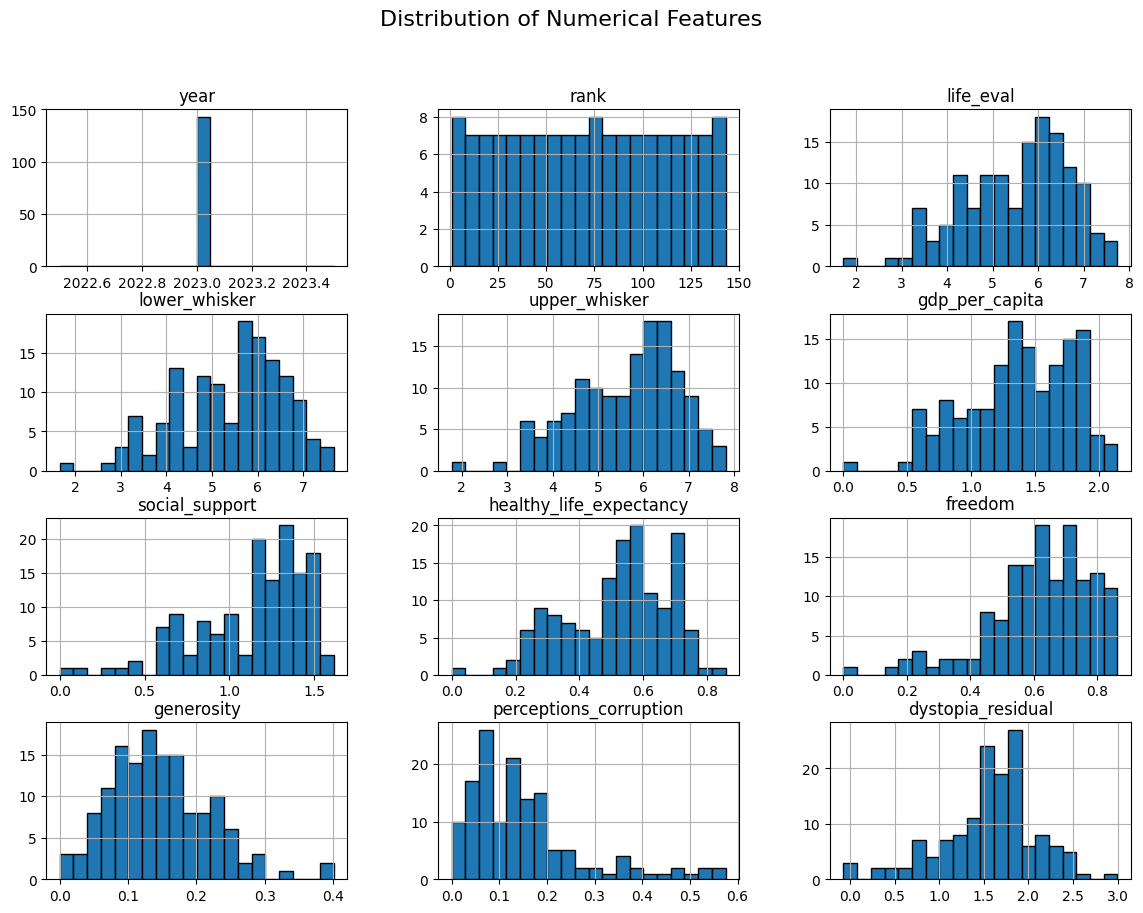

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

df_2023_filled.hist(figsize=(14,10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


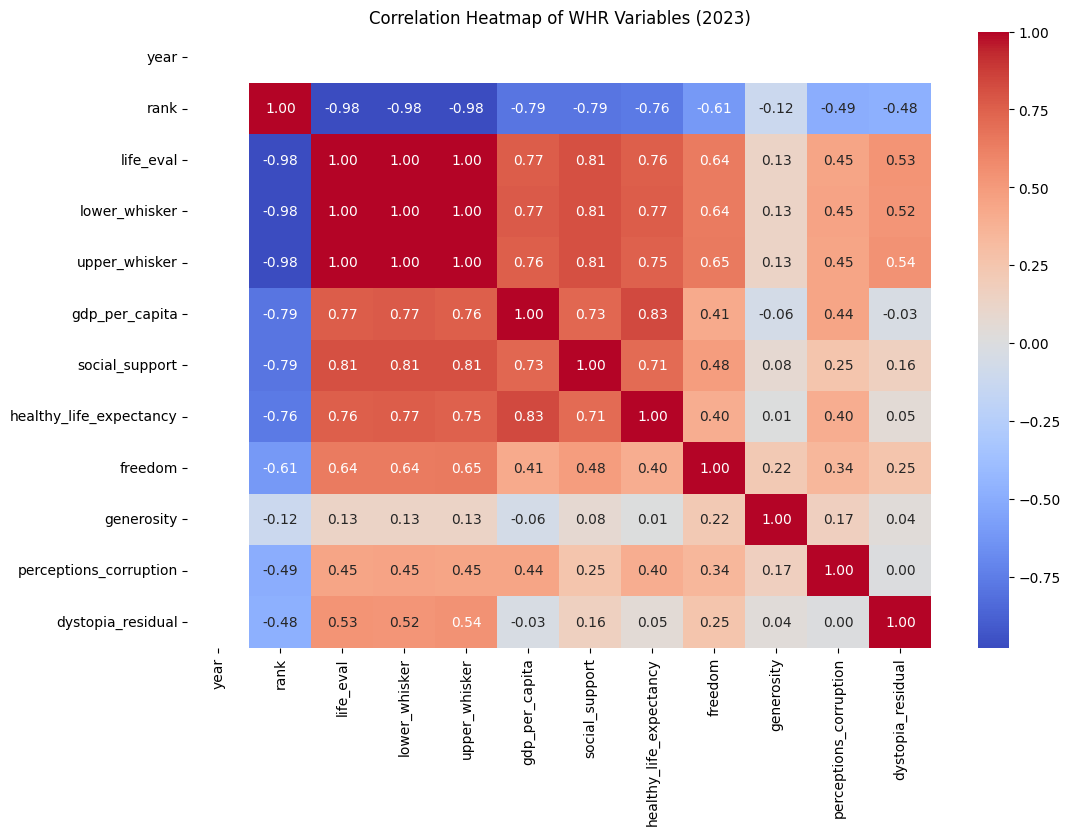

In [ ]:
#Correlation matrix
corr = df_2023_filled.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of WHR Variables (2023)")
plt.show()


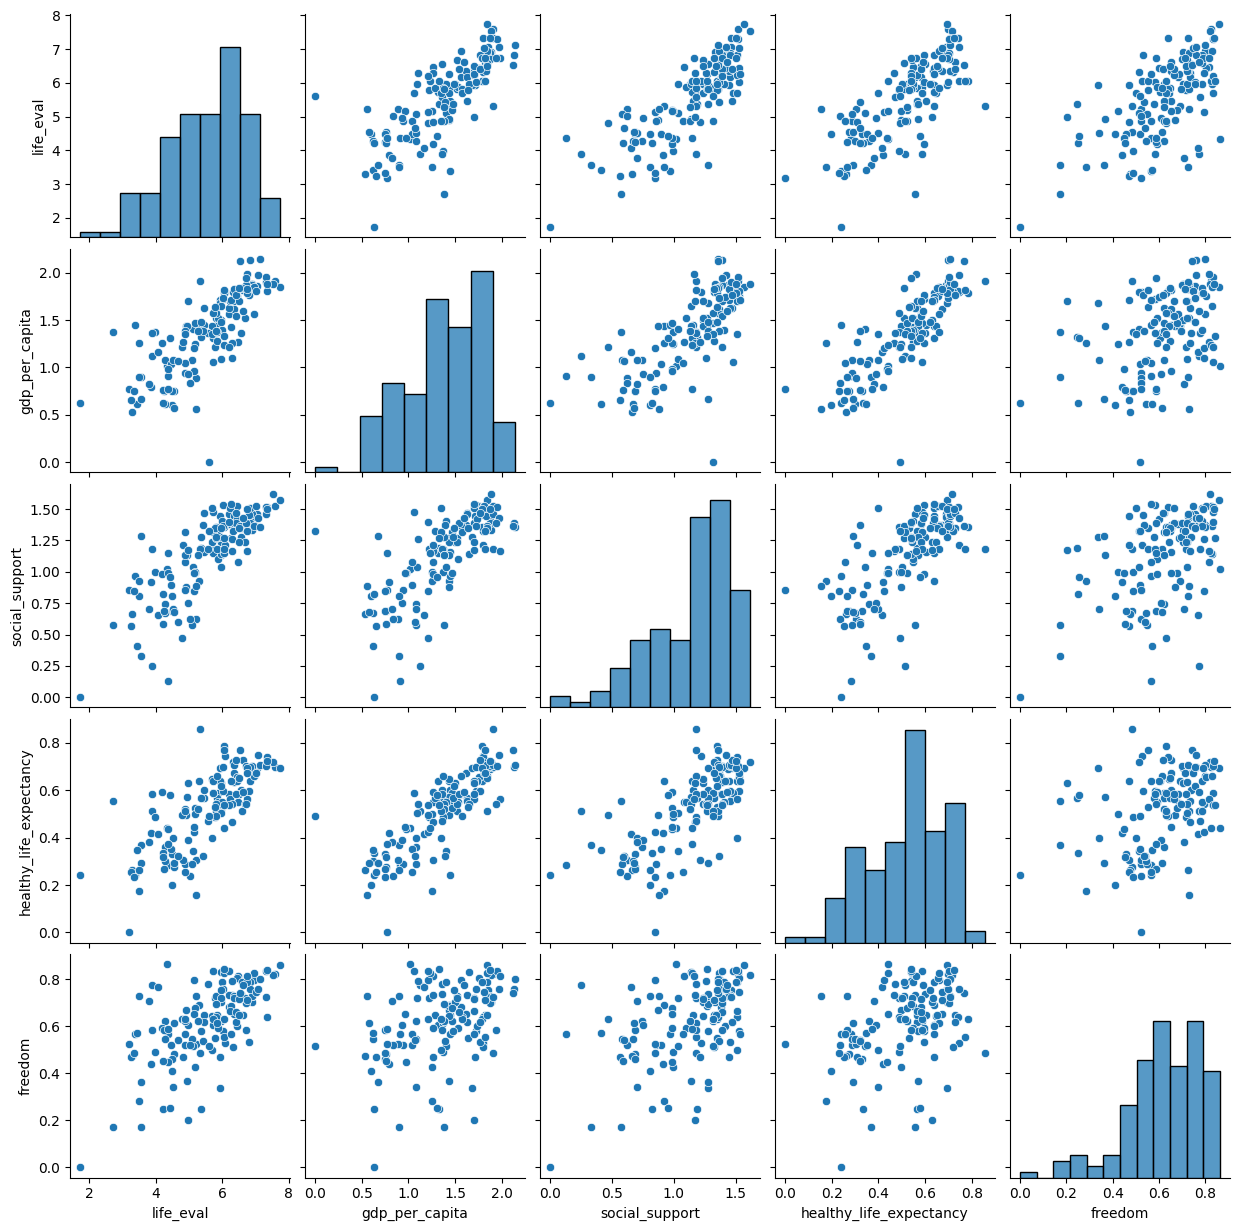

In [17]:
sns.pairplot(df_2023_filled[[
    'life_eval', 'gdp_per_capita', 'social_support',
    'healthy_life_expectancy', 'freedom'
]])
plt.show()


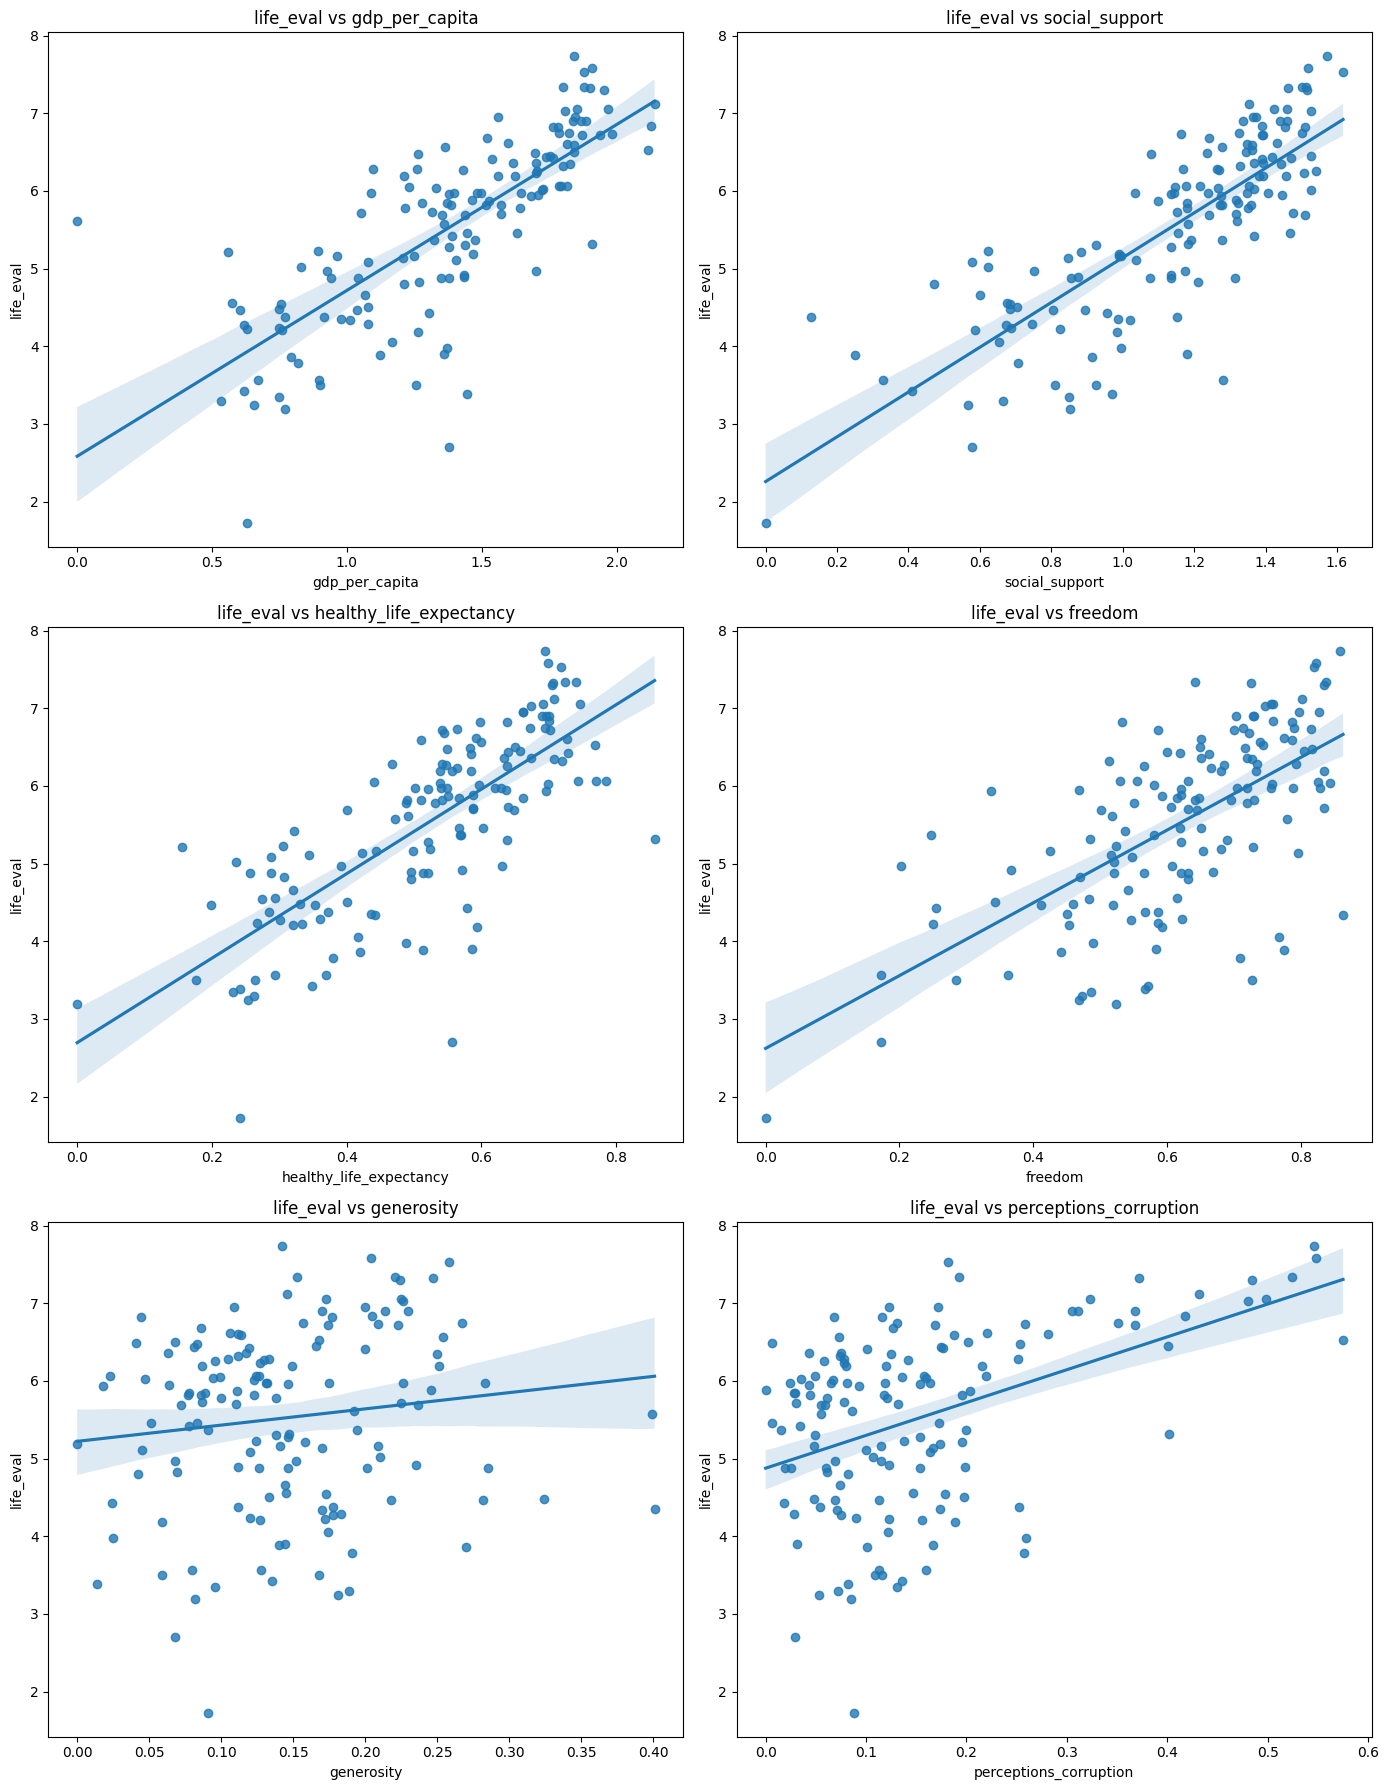

In [ ]:
# scatterplots with regression lines
features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
            'freedom', 'generosity', 'perceptions_corruption']

plt.figure(figsize=(14, 18))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.regplot(x=df_2023_filled[col], y=df_2023_filled['life_eval'])
    plt.title(f'life_eval vs {col}')

plt.tight_layout()
plt.show()


In [ ]:
# data preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# target variable
y = df_2023_filled["life_eval"]



X = df_2023_filled.drop(columns=["life_eval", "country"])  # country is categorical, drop for now


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]


(array([[ 0.        , -0.90667507,  0.76318057,  0.74894533,  1.00017266,
          0.61047175,  0.73307339,  0.21528946, -1.05598363,  0.30381127,
          0.29910006],
        [ 0.        , -1.21800326,  1.03569398,  1.0073188 ,  0.86389153,
          1.12949163,  0.65846382,  1.04303501,  0.4929258 , -0.7178196 ,
          0.50791531],
        [ 0.        ,  0.362586  , -0.17538529, -0.20433458,  0.15245788,
          0.39342708,  0.22945874, -0.19858332,  0.73449882, -1.12189749,
         -0.61705333],
        [ 0.        ,  1.39236385, -1.31401386, -1.38812415, -0.09007632,
         -0.4904795 , -0.27415592, -0.73841737, -1.66702129,  0.73838559,
         -2.33084334],
        [ 0.        ,  0.29074103, -0.10375789, -0.11905444,  0.50817471,
          0.99737748,  0.21702381,  0.04134293, -0.84283096, -1.19051448,
         -0.9406229 ]]),
 array([[ 0.        , -1.14615829,  0.95501025,  0.95665734,  0.87082108,
          1.10118145,  1.01285932,  1.05503132,  0.20872223, -0.23750

In [ ]:
# linear Regression baseline model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)


lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("RMSE:", lr_rmse)
print("R² Score:", lr_r2)


Linear Regression Results:
RMSE: 0.00036683322461368464
R² Score: 0.9999998607163736


In [ ]:
# define target to 'rank'

y = df_2023_filled["rank"]


X = df_2023_filled.drop(columns=["rank", "country"])

X.head()


,year,life_eval,lower_whisker,upper_whisker,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_corruption,dystopia_residual
1,2023.0,1.721,1.667,1.775,0.628,0.000,0.242,0.000,0.091,0.088,0.672
14,2023.0,5.304,5.168,5.440,1.438,0.924,0.638,0.690,0.138,0.049,1.428
27,2023.0,5.364,5.251,5.476,1.324,1.191,0.568,0.247,0.091,0.200,1.743
46,2023.0,6.188,6.070,6.306,1.562,1.381,0.585,0.681,0.087,0.080,1.812
59,2023.0,5.455,5.350,5.560,1.444,1.154,0.603,0.650,0.051,0.173,1.379


In [23]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

# RMSE
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = lr_mse ** 0.5

# R²
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results (Predicting Rank):")
print("RMSE:", lr_rmse)
print("R² Score:", lr_r2)


Linear Regression Results (Predicting Rank):
RMSE: 10.010582645044687
R² Score: 0.9261586431078908


In [ ]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)   

y_pred_rf = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


Random Forest Results:
RMSE: 1.4370813066741692
R² Score: 0.9984782488517395


In [ ]:


from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_rmse = gbr_mse ** 0.5
gbr_r2 = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Results:")
print("RMSE:", gbr_rmse)
print("R² Score:", gbr_r2)


Gradient Boosting Results:
RMSE: 1.1356896095410816
R² Score: 0.9990496134913053


In [ ]:


results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "RMSE": [lr_rmse, rf_rmse, gbr_rmse],
    "R² Score": [lr_r2, rf_r2, gbr_r2]
})

results



,Model,RMSE,R² Score
0,Linear Regression,10.010583,0.926159
1,Random Forest,1.437081,0.998478
2,Gradient Boosting,1.135690,0.999050


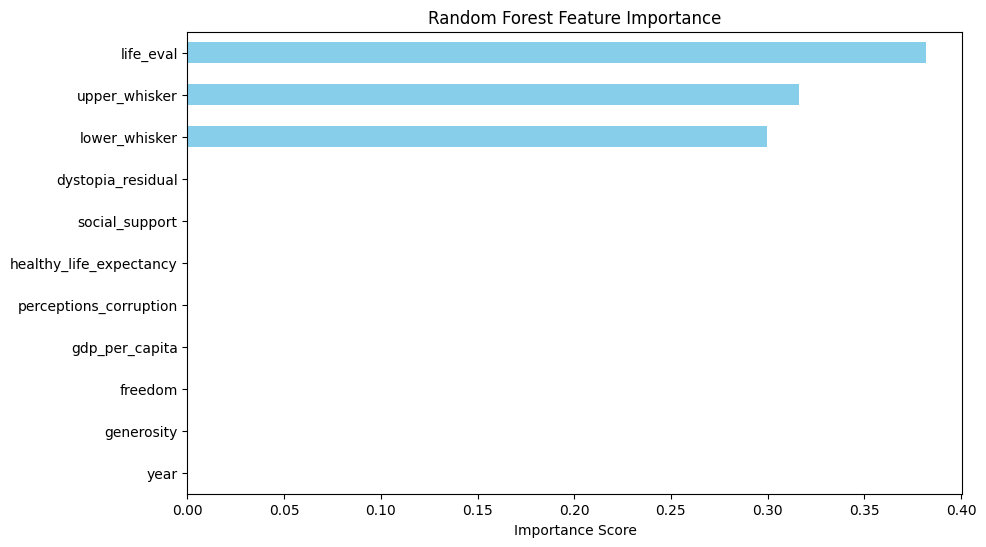

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

rf_importance = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(10,6))
rf_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()


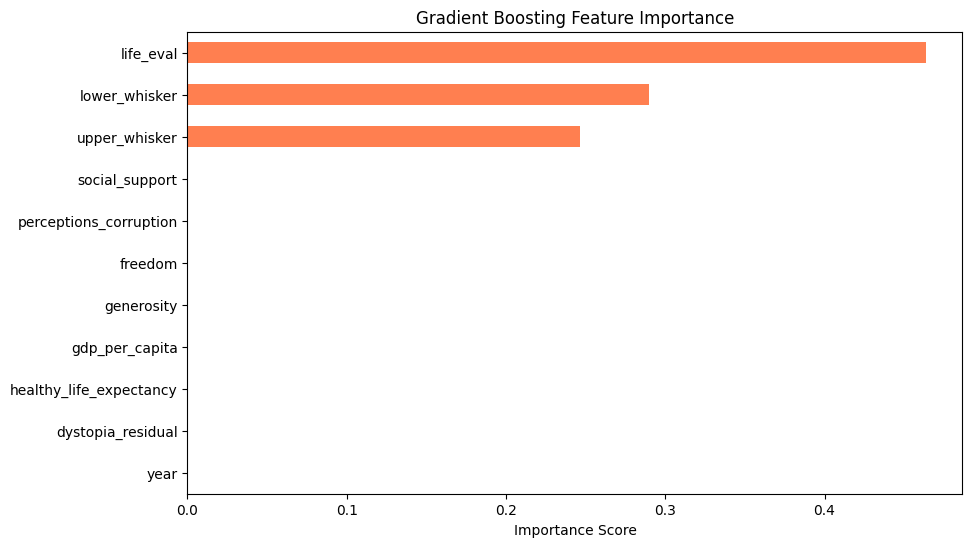

In [ ]:


gbr_importance = pd.Series(gbr.feature_importances_, index=X.columns)

plt.figure(figsize=(10,6))
gbr_importance.sort_values().plot(kind='barh', color='coral')
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [ ]:

import joblib


joblib.dump(gbr, "model.joblib")
joblib.dump(scaler, "scaler.joblib")


import json
feature_cols = X.columns.tolist()  
with open("feature_cols.json", "w") as f:
    json.dump(feature_cols, f)

print("Saved: model.joblib, scaler.joblib, feature_cols.json")


Saved: model.joblib, scaler.joblib, feature_cols.json


In [ ]:

reqs = [
    "pandas",
    "numpy",
    "scikit-learn",
    "joblib",
    "matplotlib",
    "seaborn",
    "streamlit"
]
with open("requirements.txt","w") as f:
    f.write("\n".join(reqs))
print("Wrote requirements.txt")


Wrote requirements.txt


In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import json

@st.cache_data
def load_artifacts():
    try:
        model = joblib.load("model.joblib")
        scaler = joblib.load("scaler.joblib")
        with open("feature_cols.json", "r") as f:
            feature_cols = json.load(f)
        return model, scaler, feature_cols
    except:
        return None, None, None

model, scaler, feature_cols = load_artifacts()

st.set_page_config(page_title="Happiness Rank Predictor", layout="centered")
st.title("World Happiness — Rank Predictor (2023)")

st.markdown("""
This app predicts a country's **happiness rank** using the Gradient Boosting model
trained in the coursework. Enter feature values and press **Predict**.
""")

if model is None:
    st.error("Model, scaler or feature columns file missing. Please rerun notebook.")
    st.stop()

st.subheader("Enter feature values:")
inputs = {}
cols = st.columns(2)

for i, col in enumerate(feature_cols):
    with cols[i % 2]:
        inputs[col] = st.number_input(col, value=0.0, format="%.3f")

input_df = pd.DataFrame([inputs], columns=feature_cols)
scaled_input = scaler.transform(input_df.values)

if st.button("Predict Rank"):
    pred = model.predict(scaled_input)[0]
    st.success(f"Predicted Happiness Rank: **{pred:.2f}**")


Overwriting app.py
